In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images

%matplotlib inline

In [2]:
dataset = np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, width, channels = dataset.shape

Criar dois filtros para a imagem, um vertical e um horzontal

In [3]:
filters_test = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters_test[:, 3, :, 0] = 1 #vertical (coluna do meio, 3)
filters_test[3, :, :, 1] = 1 #horizontal (linha do meio, 3)

In [4]:
filters_test[:, :, 0, 0]

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.]], dtype=float32)

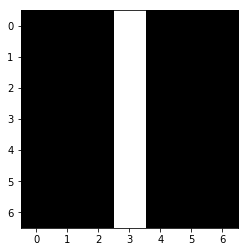

In [7]:
plt.imshow(filters_test[:, :, 0, 0], cmap="gray")

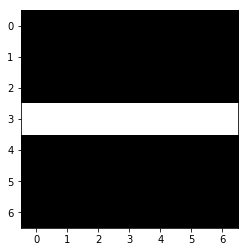

In [8]:
plt.imshow(filters_test[:, :, 0, 1], cmap="gray")

In [ ]:
filters_test[:, :, 0, 1]

Agora vamos criar um grafo com uma entrada X mais uma camada convolucional aplicando-se 2 filtros

In [29]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters_test, strides=[1, 2, 2, 1], padding="SAME") #strids NHWC (batch, height, width, channels), SAME = aplica 0 padding

In [30]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

Note que temos um output por filtro, ou seja, os filtros são aplicados em cada canal e depois estes são somados.

In [51]:
output.shape

(2, 214, 320, 2)

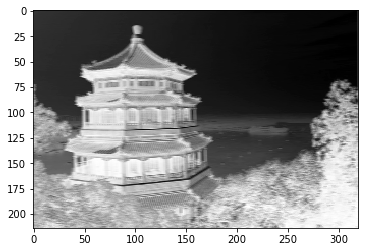

In [49]:
plt.imshow(output[0, :, :, 1], cmap=plt.cm.binary)

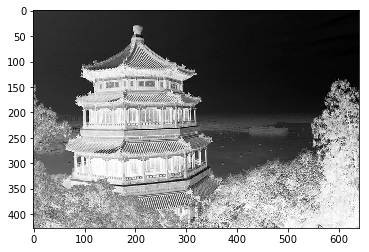

In [50]:
plt.imshow(dataset[0, :, :, 1], cmap=plt.cm.binary)